In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
from statsmodels.stats.anova import AnovaRM
import scipy.stats as stats

# Parsing Data

In [15]:
dict_data = []
participants = []
with open("backup data 6.txt") as file:
    participant = []
    counter = 0
    for line in file:
        data = line.split(',')
        if data[0] == '------------------------------------------\n':
            if len(participant) != 0:
                participants.append(participant)
            participant = []
        else:
            file_name = data[0].split('.')[0]
            intensity = int(file_name.split('_')[0])
            
            # default no audio == 0
            # in phase audio == 1
            # half phase phase audio == 2
            # out of phase audio == 3
            
            audio = 0
            #audio = 'no audio'
            if len(file_name.split('_')) > 2:
                audio_version = file_name.split('_')[2] + " " + file_name.split('_')[3]
                if audio_version == 'in phase':
                    audio = 1
                    #audio = 'in phase'
                elif audio_version == 'half phase':
                    audio = 2
                    #audio = 'half out of phase'
                elif audio_version == 'out phase':
                    audio = 3
                    #audio = 'fully out of phase'
                else:
                    print("Something went wrong!")
                    
            rating = int(data[1].split('\n')[0])
            participant.append([intensity, audio, rating])

            dict_data.append({'participant': len(participants) + 1, 'intensity': int(intensity), 'audio': audio, 'rating': rating})
            
            counter += 1
    # add last arr at end of loop
    participants.append(participant)

# Computing Means

In [16]:
data_sum = np.zeros([len(participants), 6, 4])
for i in range(len(participants)):
    participant = participants[i]
    for j in range(len(participant)):
        clip = participant[j]        
        data_sum[i, clip[0] - 1, clip[1]] += clip[2]
        
data_sum = data_sum / 5

([<matplotlib.axis.XTick at 0x19a8996cfd0>,
 [Text(2.3, 0, '2'),
  Text(3.3, 0, '3'),
  Text(4.3, 0, '4'),
  Text(5.3, 0, '5'),
  Text(6.3, 0, '6'),
  Text(7.3, 0, '7')])

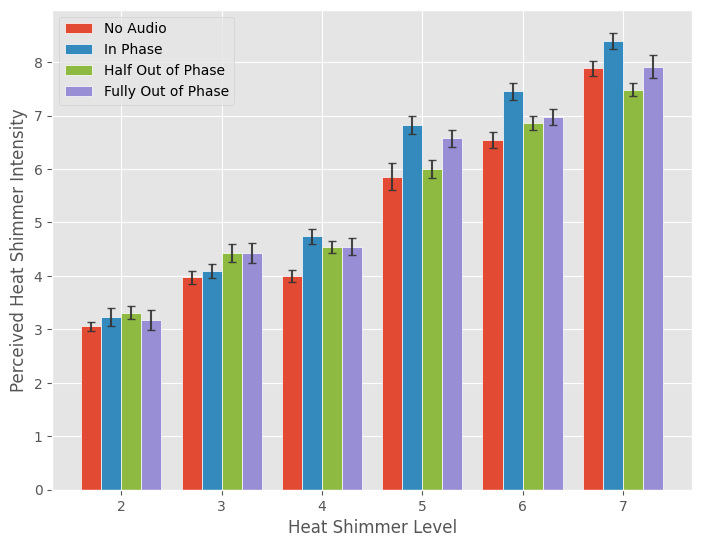

In [17]:
fig = plt.figure()
plt.style.use('ggplot')
data = np.mean(data_sum, axis = 0).T
error = np.std(data_sum, axis = 0).T / np.sqrt(5 * len(participants))
X = np.arange(6) + 2
ax = fig.add_axes([0,0,1,1])
bar_labels = ['No Audio', 'In Phase', 'Half Out of Phase', 'Fully Out of Phase']

ax.bar(X + 0, data[0], color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0], width = 0.2, capsize=3, yerr = error[0], ecolor=(0.2,0.2,0.2,0.9), edgecolor='w')
ax.bar(X + 0.2, data[1], color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1], width = 0.2, capsize=3, yerr = error[1], ecolor=(0.2,0.2,0.2,0.9), edgecolor='w')
ax.bar(X + 0.4, data[2], color = plt.rcParams['axes.prop_cycle'].by_key()['color'][5], width = 0.2, capsize=3, yerr = error[2], ecolor=(0.2,0.2,0.2,0.9), edgecolor='w')
ax.bar(X + 0.6, data[3], color = plt.rcParams['axes.prop_cycle'].by_key()['color'][2], width = 0.2, capsize=3, yerr = error[3], ecolor=(0.2,0.2,0.2,0.9), edgecolor='w')
ax.legend(bar_labels)
ax.set_xlabel("Heat Shimmer Level")
ax.set_ylabel("Perceived Heat Shimmer Intensity")
plt.xticks(X + 1.5*0.2, X)

# Distribution Histograms

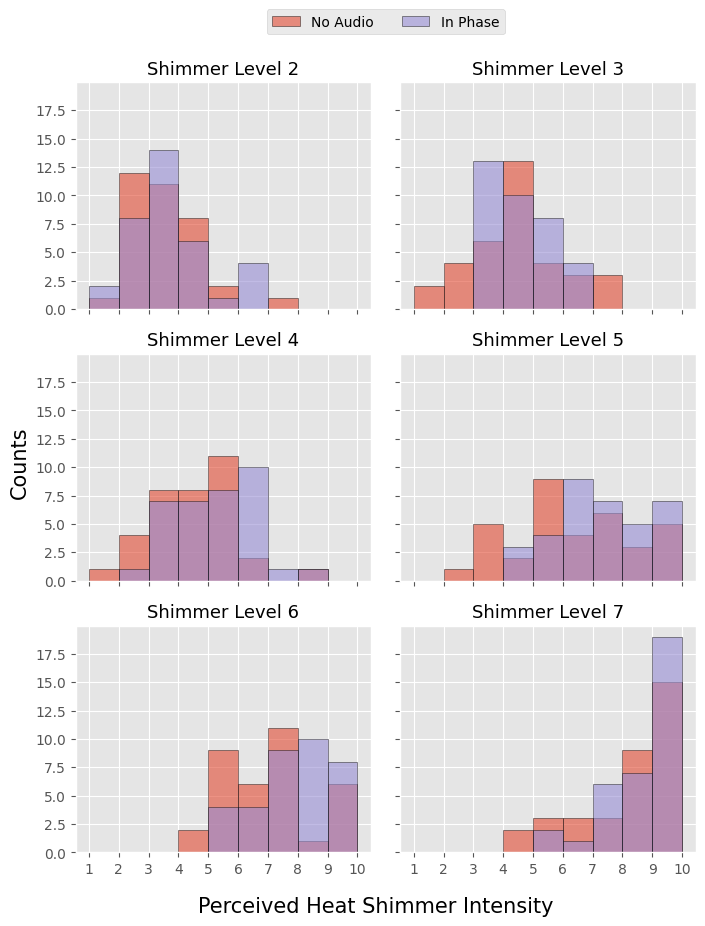

In [519]:
intens = 4

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 10), sharex=True, sharey=True)
counter = 1
for row in ax:
    for col in row:
        
        l1 = data_frame.groupby('intensity').get_group(counter).groupby('audio').get_group(0)['rating'].tolist()
        l2 = data_frame.groupby('intensity').get_group(counter).groupby('audio').get_group(1)['rating'].tolist()

        col.hist(l1, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0], bins = np.linspace(1,10, 10), alpha=0.6, edgecolor='k', label = 'No Audio')
        col.hist(l2, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][2], bins = np.linspace(1,10, 10), alpha=0.6, edgecolor='k', label = 'In Phase')
        col.set_title('Shimmer Level ' + str(counter+1), size=13)
        plt.xticks(np.linspace(1,10, 10))
        counter += 1

fig.supylabel("Counts", x=np.sqrt(11) / 100 * 1.3, fontsize = 15)
fig.supxlabel("Perceived Heat Shimmer Intensity", y=np.sqrt(11) / 100 * 1.4, fontsize = 15)

plt.subplots_adjust(wspace=0.1, hspace=0.2)

for ax in fig.get_axes():
    ax.label_outer()
    
fig.legend(['No Audio', 'In Phase'], loc='upper right', bbox_to_anchor=(0.67, 0.96), ncol=2, bbox_transform=fig.transFigure)

In [18]:
len(dict_data)

840

# Statistical Test

## Create DataFrame

In [19]:
data_frame = pd.DataFrame.from_dict(dict_data)

## ANOVA within intensity

In [21]:
df_audio = data_frame.groupby('audio')

In [22]:
anovas = []
for i in range(4):
    aov = pg.rm_anova(data=df_audio.get_group(i), dv='rating', within='intensity', subject='participant', correction=True)
    anovas.append(aov)
    print('audio', i, ':','p-GG-corr', aov['p-GG-corr'].iloc[0], '| p-unc', aov['p-unc'].iloc[0], '| p-spher', aov['p-spher'].iloc[0])

audio 0 : p-GG-corr 3.4566377510984606e-07 | p-unc 5.200504044832636e-13 | p-spher 0.4525178542529994
audio 1 : p-GG-corr 6.438142984951357e-10 | p-unc 5.032894650052009e-15 | p-spher 0.8406412713550251
audio 2 : p-GG-corr 1.349153298073861e-07 | p-unc 1.8611081387822095e-13 | p-spher 0.044117508565491376
audio 3 : p-GG-corr 5.02680739050541e-06 | p-unc 3.06142789741248e-12 | p-spher 0.15874751608809934


### No audio

In [23]:
pw = pg.pairwise_tests(data=df_audio.get_group(0), dv='rating', within='intensity', subject='participant', return_desc=True, padjust='holm')
pw.round(4)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,intensity,1,2,3.0571,0.5255,3.9714,0.7432,True,True,-3.7712,6.0,two-sided,0.0093,0.0380,holm,7.117,-1.3298
1,intensity,1,3,3.0571,0.5255,4.0000,0.6928,True,True,-3.5178,6.0,two-sided,0.0126,0.0380,holm,5.637,-1.4355
2,intensity,1,4,3.0571,0.5255,5.8571,1.5736,True,True,-4.6181,6.0,two-sided,0.0036,0.0297,holm,14.802,-2.2345
3,intensity,1,5,3.0571,0.5255,6.5429,0.9572,True,True,-8.6195,6.0,two-sided,0.0001,0.0015,holm,205.964,-4.2262
4,intensity,1,6,3.0571,0.5255,7.8857,0.8934,True,True,-11.2667,6.0,two-sided,0.0000,0.0004,holm,713.247,-6.1678
5,intensity,2,3,3.9714,0.7432,4.0000,0.6928,True,True,-0.1207,6.0,two-sided,0.9079,0.9079,holm,0.355,-0.0372
6,intensity,2,4,3.9714,0.7432,5.8571,1.5736,True,True,-4.1037,6.0,two-sided,0.0063,0.0380,holm,9.57,-1.4346
7,intensity,2,5,3.9714,0.7432,6.5429,0.9572,True,True,-7.6429,6.0,two-sided,0.0003,0.0026,holm,119.926,-2.8093
8,intensity,2,6,3.9714,0.7432,7.8857,0.8934,True,True,-8.8433,6.0,two-sided,0.0001,0.0015,holm,231.48,-4.4594
9,intensity,3,4,4.0000,0.6928,5.8571,1.5736,True,True,-4.4433,6.0,two-sided,0.0044,0.0305,holm,12.802,-1.4300


### In phase

In [24]:
pw = pg.pairwise_tests(data=df_audio.get_group(1), dv='rating', within='intensity', subject='participant', return_desc=True, padjust='holm')
pw.round(4)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,intensity,1,2,3.2286,1.0797,4.0857,0.8235,True,True,-2.5852,6.0,two-sided,0.0415,0.1293,holm,2.279,-0.8357
1,intensity,1,3,3.2286,1.0797,4.7429,0.8772,True,True,-6.6951,6.0,two-sided,0.0005,0.0046,holm,67.155,-1.4412
2,intensity,1,4,3.2286,1.0797,6.8286,1.0797,True,True,-9.0000,6.0,two-sided,0.0001,0.0013,holm,250.838,-3.1215
3,intensity,1,5,3.2286,1.0797,7.4571,1.0114,True,True,-8.6169,6.0,two-sided,0.0001,0.0013,holm,205.678,-3.7843
4,intensity,1,6,3.2286,1.0797,8.4000,0.9661,True,True,-14.4301,6.0,two-sided,0.0000,0.0001,holm,2323.636,-4.7257
5,intensity,2,3,4.0857,0.8235,4.7429,0.8772,True,True,-2.3038,6.0,two-sided,0.0608,0.1293,holm,1.719,-0.7231
6,intensity,2,4,4.0857,0.8235,6.8286,1.0797,True,True,-6.1125,6.0,two-sided,0.0009,0.0061,holm,45.57,-2.6743
7,intensity,2,5,4.0857,0.8235,7.4571,1.0114,True,True,-8.7790,6.0,two-sided,0.0001,0.0013,holm,223.892,-3.4225
8,intensity,2,6,4.0857,0.8235,8.4000,0.9661,True,True,-12.4684,6.0,two-sided,0.0000,0.0002,holm,1153.331,-4.4996
9,intensity,3,4,4.7429,0.8772,6.8286,1.0797,True,True,-5.6377,6.0,two-sided,0.0013,0.0080,holm,32.572,-1.9850


### Half out of phase

In [25]:
pw = pg.pairwise_tests(data=df_audio.get_group(3), dv='rating', within='intensity', subject='participant', return_desc=True, padjust='holm')
pw.round(4)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,intensity,1,2,3.1714,1.1912,4.4286,1.1912,True,True,-4.4599,6.0,two-sided,0.0043,0.0214,holm,12.981,-0.9880
1,intensity,1,3,3.1714,1.1912,4.5429,1.0309,True,True,-6.7882,6.0,two-sided,0.0005,0.0050,holm,71.282,-1.1525
2,intensity,1,4,3.1714,1.1912,6.5714,0.9759,True,True,-8.6030,6.0,two-sided,0.0001,0.0019,holm,204.179,-2.9231
3,intensity,1,5,3.1714,1.1912,6.9714,0.9196,True,True,-8.3397,6.0,two-sided,0.0002,0.0021,holm,177.34,-3.3430
4,intensity,1,6,3.1714,1.1912,7.9143,1.3459,True,True,-6.9469,6.0,two-sided,0.0004,0.0049,holm,78.797,-3.4936
5,intensity,2,3,4.4286,1.1912,4.5429,1.0309,True,True,-0.5876,6.0,two-sided,0.5782,0.5782,holm,0.407,-0.0960
6,intensity,2,4,4.4286,1.1912,6.5714,0.9759,True,True,-6.6993,6.0,two-sided,0.0005,0.0050,holm,67.335,-1.8423
7,intensity,2,5,4.4286,1.1912,6.9714,0.9196,True,True,-8.9149,6.0,two-sided,0.0001,0.0017,holm,240.163,-2.2371
8,intensity,2,6,4.4286,1.1912,7.9143,1.3459,True,True,-6.5026,6.0,two-sided,0.0006,0.0050,holm,59.247,-2.5676
9,intensity,3,4,4.5429,1.0309,6.5714,0.9759,True,True,-5.9793,6.0,two-sided,0.0010,0.0069,holm,41.551,-1.8919


### Fully out of phase

In [26]:
pw = pg.pairwise_tests(data=df_audio.get_group(2), dv='rating', within='intensity', subject='participant', return_desc=True, padjust='holm')
pw.round(4)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,intensity,1,2,3.3143,0.7290,4.4286,1.0484,True,True,-5.8795,6.0,two-sided,0.0011,0.0075,holm,38.737,-1.1553
1,intensity,1,3,3.3143,0.7290,4.5429,0.6803,True,True,-10.3283,6.0,two-sided,0.0000,0.0006,holm,474.196,-1.6312
2,intensity,1,4,3.3143,0.7290,6.0000,1.0520,True,True,-6.2853,6.0,two-sided,0.0008,0.0060,holm,51.263,-2.7782
3,intensity,1,5,3.3143,0.7290,6.8571,0.8696,True,True,-12.7221,6.0,two-sided,0.0000,0.0002,holm,1269.633,-4.1336
4,intensity,1,6,3.3143,0.7290,7.4857,0.7904,True,True,-12.5041,6.0,two-sided,0.0000,0.0002,holm,1169.139,-5.1362
5,intensity,2,3,4.4286,1.0484,4.5429,0.6803,True,True,-0.6378,6.0,two-sided,0.5472,0.5472,holm,0.417,-0.1211
6,intensity,2,4,4.4286,1.0484,6.0000,1.0520,True,True,-3.6858,6.0,two-sided,0.0103,0.0456,holm,6.584,-1.4008
7,intensity,2,5,4.4286,1.0484,6.8571,0.8696,True,True,-7.4077,6.0,two-sided,0.0003,0.0031,holm,104.417,-2.3606
8,intensity,2,6,4.4286,1.0484,7.4857,0.7904,True,True,-6.7808,6.0,two-sided,0.0005,0.0045,holm,70.948,-3.0828
9,intensity,3,4,4.5429,0.6803,6.0000,1.0520,True,True,-4.0277,6.0,two-sided,0.0069,0.0414,holm,8.953,-1.5399


## ANOVA within audio

In [29]:
df_inten = data_frame.groupby('intensity')

In [34]:
anovas = []
for i in range(6):
    print('Intensity', i+1)
    aov = pg.rm_anova(data=df_inten.get_group(i+1), dv='rating', within='audio', subject='participant', correction=True)
    anovas.append(aov)
    print("uncorrected p-score", aov['p-unc'].iloc[0], "corrected p-score", aov['p-GG-corr'].iloc[0])

Intensity 1
uncorrected p-score 0.8130145586393265 corrected p-score 0.7324027453597198
Intensity 2
uncorrected p-score 0.3903204141289722 corrected p-score 0.3747443329490733
Intensity 3
uncorrected p-score 0.10419036565741933 corrected p-score 0.14541585911327054
Intensity 4
uncorrected p-score 0.3242252020067498 corrected p-score 0.3181356618494904
Intensity 5
uncorrected p-score 0.11157537309559447 corrected p-score 0.16251992315183958
Intensity 6
uncorrected p-score 0.26518926631674644 corrected p-score 0.27555960982958966


## Dependent t-test for paired samples

In [21]:
for i in range(6):
    intensity = i + 1
    audio_0 = df_inten.get_group(intensity).groupby('audio').get_group(0)['rating'].tolist()
    audio_1 = df_inten.get_group(intensity).groupby('audio').get_group(1)['rating'].tolist()
    audio_2 = df_inten.get_group(intensity).groupby('audio').get_group(2)['rating'].tolist()
    audio_3 = df_inten.get_group(intensity).groupby('audio').get_group(3)['rating'].tolist()
    
    if (len(audio_1) != len(audio_0)):
        new_len = min(len(audio_0), len(audio_1))
        audio_0 = audio_0[:new_len-1]
        audio_1 = audio_1[:new_len-1]

    rt_0_1 = "{:.3f}".format(stats.ttest_rel(audio_0, audio_1).pvalue)
    rt_0_2 = "{:.3f}".format(stats.ttest_rel(audio_0, audio_2).pvalue)
    rt_0_3 = "{:.3f}".format(stats.ttest_rel(audio_0, audio_3).pvalue)
    
    print("Intensity:", i+1, "no/in:", rt_0_1, "no/half:", rt_0_2, "no/out:", rt_0_3)

for i in range(6):
    intensity = i + 1
    audio_0 = df_inten.get_group(intensity).groupby('audio').get_group(0)['rating'].tolist()
    audio_1 = df_inten.get_group(intensity).groupby('audio').get_group(1)['rating'].tolist()
    audio_2 = df_inten.get_group(intensity).groupby('audio').get_group(2)['rating'].tolist()
    audio_3 = df_inten.get_group(intensity).groupby('audio').get_group(3)['rating'].tolist()
    
    if (len(audio_1) != len(audio_0)):
        new_len = min(len(audio_0), len(audio_1))
        audio_0 = audio_0[:new_len-1]
        audio_1 = audio_1[:new_len-1]

    rt_0_1 = "{:.3f}".format(stats.ttest_rel(audio_1, audio_2).pvalue)
    rt_0_2 = "{:.3f}".format(stats.ttest_rel(audio_1, audio_3).pvalue)
    rt_0_3 = "{:.3f}".format(stats.ttest_rel(audio_2, audio_3).pvalue)
    
    print("Intensity:", i+1, "in/half:", rt_0_1, "in/out:", rt_0_2, "out/half:", rt_0_3)

Intensity: 1 no/in: 0.404 no/half: 0.378 no/out: 0.629
Intensity: 2 no/in: 0.689 no/half: 0.164 no/out: 0.183
Intensity: 3 no/in: 0.040 no/half: 0.100 no/out: 0.097
Intensity: 4 no/in: 0.016 no/half: 0.684 no/out: 0.114
Intensity: 5 no/in: 0.018 no/half: 0.303 no/out: 0.183
Intensity: 6 no/in: 0.133 no/half: 0.317 no/out: 0.948
Intensity: 1 in/out: 0.734 in/half: 0.794 out/half: 0.523
Intensity: 2 in/out: 0.226 in/half: 0.280 out/half: 1.000
Intensity: 3 in/out: 0.466 in/half: 0.461 out/half: 1.000
Intensity: 4 in/out: 0.034 in/half: 0.342 out/half: 0.149
Intensity: 5 in/out: 0.059 in/half: 0.061 out/half: 0.683
Intensity: 6 in/out: 0.013 in/half: 0.114 out/half: 0.224
